In [1]:
import numpy as np
import pandas as pd

In [2]:
train_probs = pd.read_csv('train_probs.csv')

In [3]:
test_probs = pd.read_csv('test_probs.csv')

In [4]:
submission_probs = pd.read_csv('submission_probs.csv')

In [5]:
app_tr = pd.read_csv('application_train.csv')

In [6]:
y = app_tr.TARGET.values

In [7]:
del app_tr

In [8]:
y_tr = y[:train_probs.shape[0]]

In [9]:
y_ts = y[train_probs.shape[0]:]

In [10]:
y_tr.shape

(261385,)

In [11]:
train_probs.head()

,Unnamed: 0,best_rf,simple_xgbc,xgbc_selec_cv,xgbc_less_cv,nn_selec,nn_full
0,100002,0.277769,0.314071,0.259294,0.380187,0.277060,0.312685
1,100003,0.040991,0.034275,0.015042,0.033700,0.028860,0.072450
2,100004,0.060233,0.036301,0.020286,0.024342,-0.005319,0.127138
3,100006,0.053465,0.037015,0.022415,0.038694,0.059134,0.263857
4,100007,0.061021,0.091228,0.060749,0.053903,0.077200,0.443544


In [12]:
X_tr = train_probs.iloc[:, 1:].values

In [13]:
X_tr.shape

(261385, 6)

In [15]:
test_probs.head()

,Unnamed: 0,best_rf,simple_xgbc,xgbc_selec_cv,xgbc_less_cv,nn_selec,nn_full
0,402543,0.069787,0.087951,0.033092,0.075479,0.023001,-0.325987
1,402544,0.114269,0.192056,0.199578,0.183206,0.157278,0.189638
2,402545,0.053718,0.030099,0.014147,0.019314,0.012259,-0.009581
3,402546,0.061051,0.073467,0.068520,0.073169,0.084769,0.047060
4,402547,0.068829,0.046952,0.014268,0.013551,-0.016062,0.076357


In [16]:
X_ts = test_probs.iloc[:, 1:].values

In [17]:
X_ts.shape

(46126, 6)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
roc_auc_score(y_tr, lr.predict(X_tr))

0.8407746983543727

In [22]:
roc_auc_score(y_ts, lr.predict(X_ts))

0.8339028693792359

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()

In [25]:
log.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
roc_auc_score(y_tr, log.predict_proba(X_tr)[:,1])

0.8403334404858303

In [27]:
roc_auc_score(y_ts, log.predict_proba(X_ts)[:, 1])

0.8346044727359078

In [28]:
from xgboost.sklearn import XGBClassifier

In [29]:
xgbc = XGBClassifier()

In [30]:
xgbc.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
roc_auc_score(y_tr, xgbc.predict_proba(X_tr)[:, 1])

0.8542513911715908

In [43]:
roc_auc_score(y_ts, xgbc.predict_proba(X_ts)[:, 1])

0.8490448487509934

In [48]:
X_sub = submission_probs.iloc[:, 1:].values

In [49]:
X_sub.shape

(48744, 6)

In [50]:
X_tr.shape

(261385, 6)

In [51]:
sub = pd.read_csv('sample_submission.csv')

In [52]:
sub['TARGET'] = lr.predict(X_sub)

In [53]:
import seaborn as sns

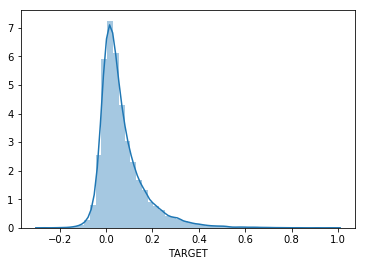

In [54]:
sns.distplot(sub['TARGET'])

In [55]:
for i in sub[sub['TARGET']<0].index:
    sub.loc[i, 'TARGET'] = 0

In [56]:
for i in sub[sub['TARGET']>1].index:
    sub.loc[i, 'TARGET'] = 1

In [57]:
sub.to_csv('linear_regression_ensemble.csv', index=False)

In [58]:
sub['TARGET'] = log.predict_proba(X_sub)[:, 1]

In [59]:
sub.to_csv('logistic_regression_ensemble.csv', index=False)

In [60]:
sub['TARGET'] = xgbc.predict_proba(X_sub)[:, 1]

In [61]:
sub.to_csv('xgbc_ensemble.csv', index=False)